In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy import integrate
import matplotlib as mpl
import copy
from methods import *

In [2]:
init_mpl(150,mat_settings = True)

# Boundary conditions + source term

In [3]:
   
def v0(x,y):
    cache =  np.piecewise(x, [np.round(y,5)  >= 1, np.round(y,5) < 1],[lambda x: 1,lambda x: 0])
    
    return np.array([cache,0])


def f(x,y):
    return np.array([0,0])
    




# Running the simulation

The $\textbf{Stokes_FEM}$ method returns the quantities $\omega$, $v_1$, $v_2$, $p$, $\nabla \cdot \mathbf{v}$, and $\psi$ (in that order) evaluated on the element centers. Note here that $\psi$ is the stream function defined as

$$\psi = v_{2,1} - v_{1,2}.  $$

The method requires boundary condition $\mathbf{v}_{\partial}$ ($\textbf{function v0(x,y)}$) and source function $\mathbf{f}$ ($\textbf{function f(x,y)}$). The visualization of the matrices can be turned off by setting $\textbf{visualize_matrices = False}$. If $\mathbf{f} = (0,0)$ one can set $\textbf{f_zero = True}$. In this way the program does not evaluate the 2D numerical quadrature for the source integral which saves a lot of computation time. 

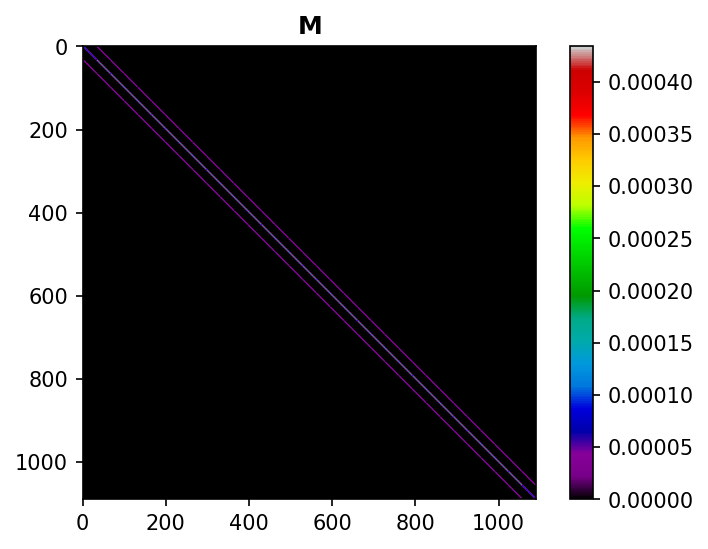

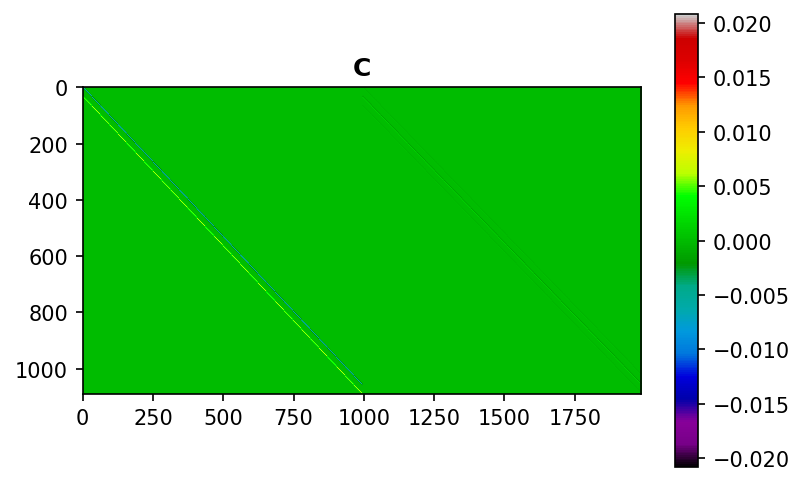

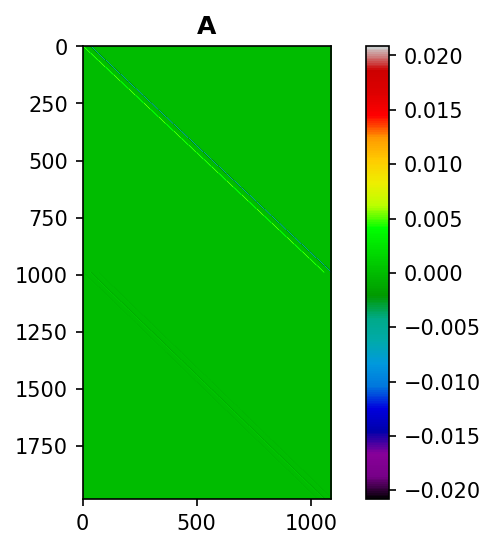

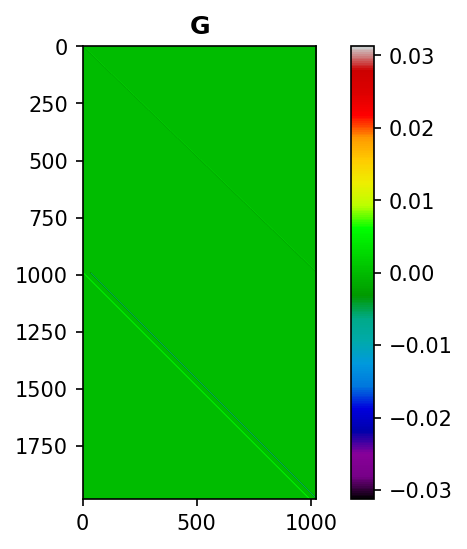

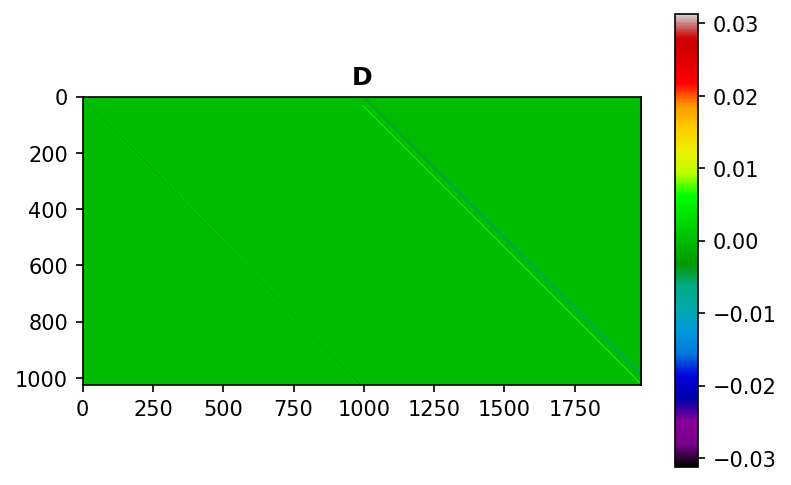

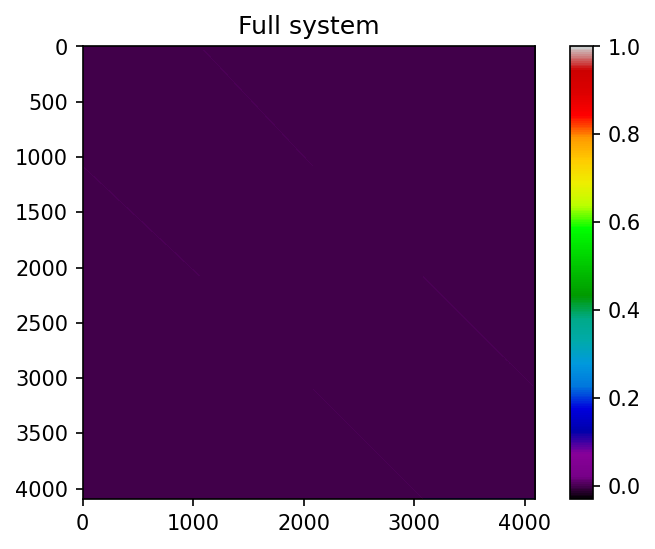

In [4]:
######## Defining the domain and grid resolution ###############
xmin=0
xmax =1
ymin = 0
ymax = 1

n1 = 32 ### x-resolution
n2 = 32### y-resolution
grid = form_grid(n1,n2,xmin,xmax,ymin,ymax)
##############################################


################ Running the simulation. Set f_zero = True if the source term is zero.##############################
################ This makes that we do not need to evaluate the 2D quadrature.        ##############################
w,vx,vy,p,dv,psi = Stokes_FEM(grid,v0,f,f_zero =True, visualize_matrices = True)
###############################################################################################################


# Gathering some data for plotting purposes

In [5]:
###################################### Cell centred grid for plotting purposes ########################
cxmin = xmin + 1/2*(xmax - xmin)/n1
cxmax = xmax - 1/2*(xmax - xmin)/n1
cymin = ymin + 1/2*(ymax - ymin)/n2
cymax = ymax - 1/2*(ymax - ymin)/n2

center_mesh = form_grid(n1-1,n2-1,cxmin,cxmax,cymin,cymax)

x_mesh = center_mesh[:,:,0]
y_mesh = center_mesh[:,:,1]
#########################################################################################################

# $\mathbf{v}$ evaluated on the element centers

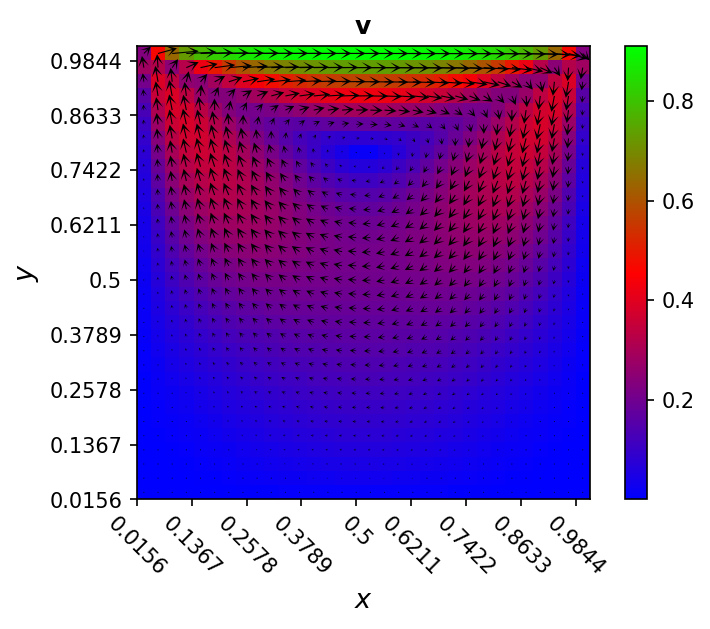

In [6]:

ranges = [cxmin,cxmax,cymin,cymax]


M = np.hypot(vx, vy)
vis_mat(M,plot = False,color = 'brg',ranges = ranges)



y_normalizer = 2*n2/n1



corr_x = (2-2/n1)/(cxmax -cxmin)*x_mesh
corr_x = corr_x - np.average(corr_x)
corr_y = (y_normalizer-y_normalizer/n2)/(cymax -cymin)*y_mesh
corr_y = corr_y - np.average(corr_y)



plt.quiver(corr_x,corr_y,vx,vy,headwidth = 10,headlength = 10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathbf{v}$')

plt.show()


# $v_1$, $v_2$, $p$, and $\nabla \cdot \mathbf{v}$ evaluated on the element centers

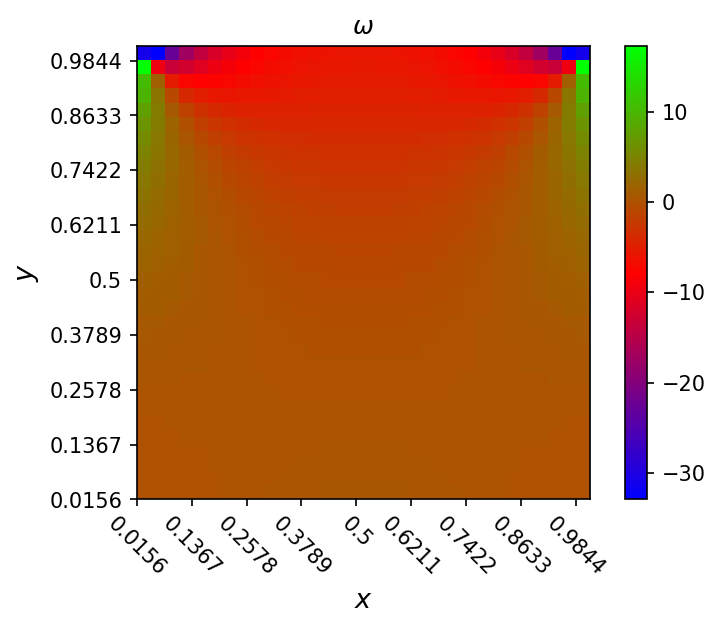

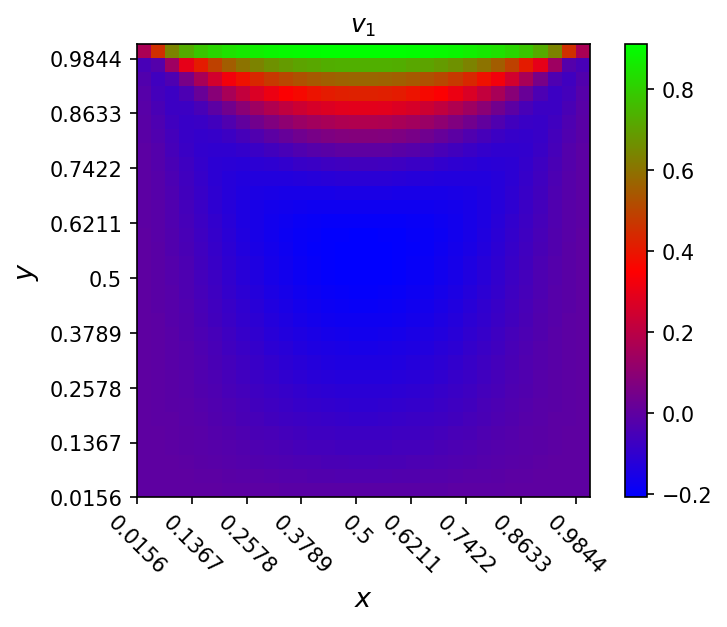

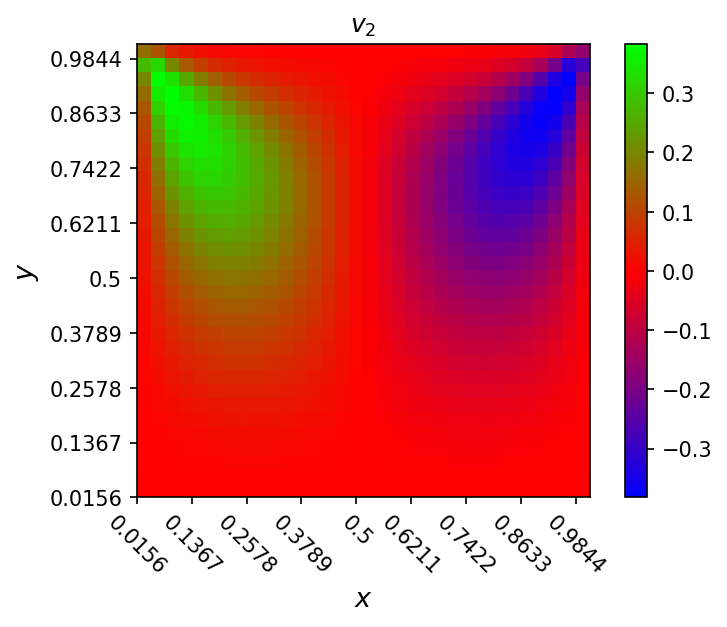

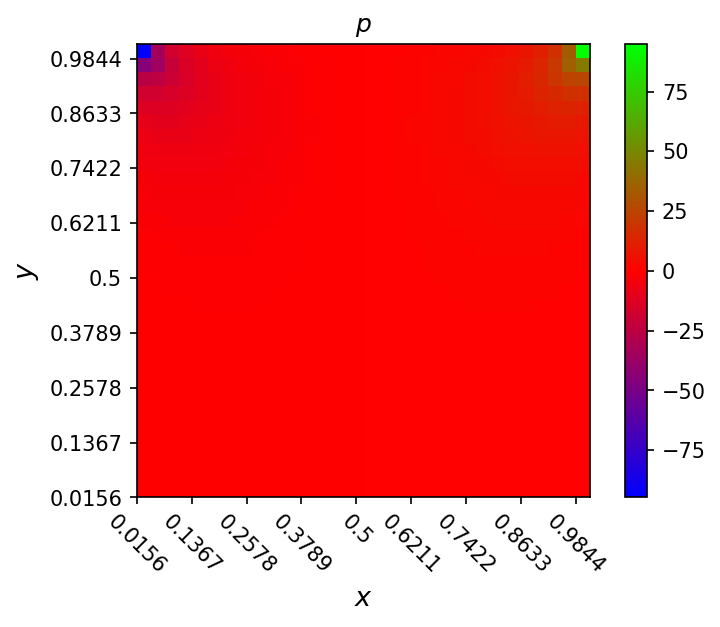

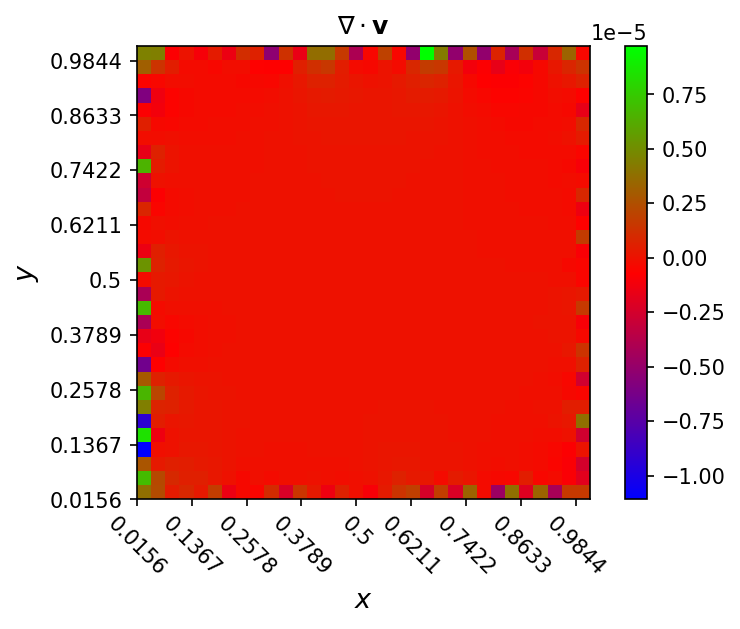

In [7]:
vis_mat(w,color = 'brg', ranges = ranges,plot =False)
plt.title('$\omega$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

vis_mat(vx,color = 'brg', ranges = ranges,plot =False)
plt.title('$v_1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

vis_mat(vy,color = 'brg', ranges = ranges,plot =False)
plt.title('$v_2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

vis_mat(p,color = 'brg', ranges = ranges,plot =False)
plt.title('$p$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

vis_mat(dv,color = 'brg', ranges = ranges,plot =False)
plt.title('$ ∇ \cdot \mathbf{v}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()





# $\psi$ evaluated on the element centers

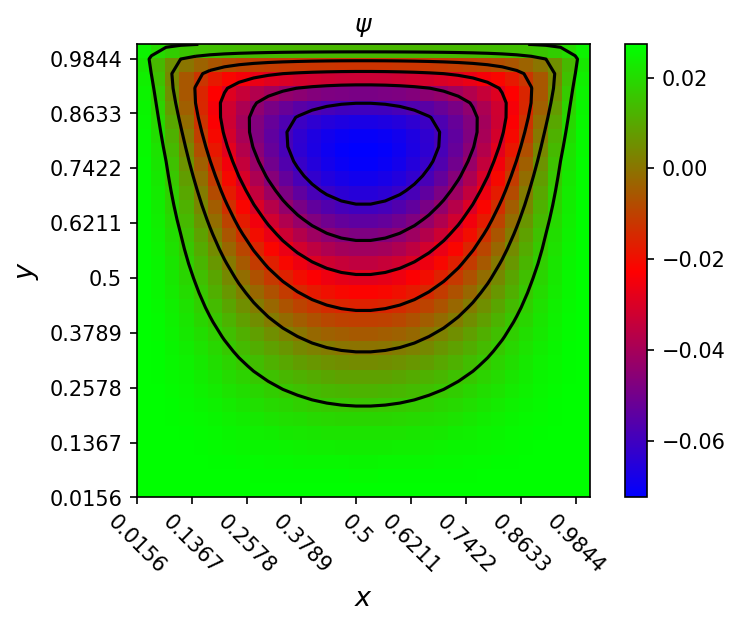

In [8]:
vis_mat(psi,color = 'brg', ranges = ranges,plot =False)
plt.title('$\psi$')
plt.xlabel('$x$')
plt.ylabel('$y$')

x = np.linspace(-1,1,n1)
y = np.linspace((n2/n1)*1,-(n2/n1)*1,n2)
xx, yy = np.meshgrid(x, y)
plt.contour(xx, yy, psi, colors = 'black',levels = 7,linestyles = '-')
plt.show()
